In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def visualize(input, faces, thickness=2):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)

            cv.rectangle(input, (coords[0], coords[1]), (coords[0] + coords[2], coords[1] + coords[3]), (0,255,0), 2)

def visualize2(input, faces):
    if faces[1] is not None:
        for idx, face in enumerate(faces[1]):
            coords = face[:-1].astype(np.int32)

            cv.rectangle(input, (coords[0], coords[1]), (coords[0] + coords[2], coords[1] + coords[3]), (0,0,255), 2)

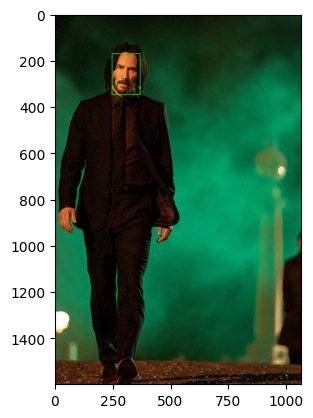

In [3]:
detector = cv.FaceDetectorYN.create(r"D:\Opencv\quiz 19\mini project2\face_detection_yunet_2023mar.onnx", "", (320,320), 0.6, 0.2, 5000)

image = cv.imread(r"D:\Opencv\quiz 19\mini project2\john-wick-changed-movies-forever-culture.jpeg")
imgWidth = int(image.shape[1])
imgHeight = int(image.shape[0])
image = cv.resize(image, (imgWidth, imgHeight))

detector.setInputSize((imgWidth, imgHeight))

faces1 = detector.detect(image)
visualize(image, faces1)

plt.imshow(image[...,::-1])

In [8]:
cap = cv.VideoCapture(r"D:\Opencv\quiz 19\mini project2\giphy.gif")
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
output1 = cv.VideoWriter("video1.mp4", cv.VideoWriter_fourcc(*'.mp4'), 10, (width, height))

while True:
    if not cap.isOpened():
        break
    ret, frame = cap.read()
    if not ret:
        break

    detector = cv.FaceDetectorYN.create(r"D:\Opencv\quiz 19\mini project2\face_detection_yunet_2023mar.onnx", "", (320,320), 0.6, 0.2, 5000)

    
    frameWidth = int(frame.shape[1])
    frameHeight = int(frame.shape[0])
    frame = cv.resize(frame, (frameWidth, frameHeight))

    detector.setInputSize((frameWidth, frameHeight))

    faces2 = detector.detect(frame)
    #visualize(frame, faces2)
    
    recognizer = cv.FaceRecognizerSF.create(r"D:\Opencv\quiz 19\mini project2\face_recognition_sface_2021dec.onnx", "")
    if faces2 != None:
        faces1_align = recognizer.alignCrop(image, faces1[1][0])
        faces2_align = recognizer.alignCrop(frame, faces2[1][0])

        faces1_feature = recognizer.feature(faces1_align)
        faces2_feature = recognizer.feature(faces2_align)

        score = recognizer.match(faces1_feature, faces2_feature, cv.FaceRecognizerSF_FR_NORM_L2)

        if score <= 1.128:
            visualize(frame, faces2)
        else:
            visualize2(frame, faces2)

        output1.write(frame)
        #cv.imshow("Frame", frame)

        #k = cv.waitKey(30) & 0xff
        #if k == 27:
         #   break

cv.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\onnx\onnx_importer.cpp:275: error: (-5:Bad argument) Can't read ONNX file: D:\Opencv\quiz 19\mini project2\face_recognition_sface_2021dec.onnx in function 'cv::dnn::dnn4_v20231225::ONNXImporter::ONNXImporter'


In [5]:
cap = cv.VideoCapture(r"D:\Opencv\quiz 19\mini project2\giphy (1).gif")

while True:
    if not cap.isOpened():
        break
    ret, frame = cap.read()
    if not ret:
        break

    detector = cv.FaceDetectorYN.create(r"D:\Opencv\quiz 19\mini project2\face_detection_yunet_2023mar.onnx", "", (320,320), 0.6, 0.2, 5000)

    
    frameWidth = int(frame.shape[1])
    frameHeight = int(frame.shape[0])
    frame = cv.resize(frame, (frameWidth, frameHeight))

    detector.setInputSize((frameWidth, frameHeight))

    faces2 = detector.detect(frame)
    #visualize(frame, faces2)
    
    recognizer = cv.FaceRecognizerSF.create(r"D:\Opencv\quiz 19\mini project2\face_recognition_sface_2021dec.onnx", "")
    if faces2 != None:
        faces1_align = recognizer.alignCrop(image, faces1[1][0])
        faces2_align = recognizer.alignCrop(frame, faces2[1][0])

        faces1_feature = recognizer.feature(faces1_align)
        faces2_feature = recognizer.feature(faces2_align)

        score = recognizer.match(faces1_feature, faces2_feature, cv.FaceRecognizerSF_FR_NORM_L2)

        if score <= 1.128:
            visualize(frame, faces2)
        else:
            visualize2(frame, faces2)

        cv.imshow("Frame", frame)

        k = cv.waitKey(30) & 0xff
        if k == 27:
            break

cv.destroyAllWindows()